In [103]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
# Fetch Bitcoin data
btc_data = yf.download('BTC-USD', start='2015-01-01', end='2025-02-10')

[*********************100%***********************]  1 of 1 completed


In [112]:
# Calculate IBS
btc_data['IBS'] = (btc_data['Close'] - btc_data['Low']) / (btc_data['High'] - btc_data['Low'])

In [113]:
# Initialize position and PnL columns
btc_data['Position'] = 0
btc_data['PnL'] = 0

In [114]:
# Implement the strategy
position = 0  # 0 means no position, -1 means short position
entry_price = 0.0

In [115]:
for i in range(1, len(btc_data)):
    if btc_data['IBS'].iloc[i-1] > 0.9 and position == 0:
        # Short at the close
        position = -1
        entry_price = btc_data['Close'].iloc[i].item() # Extract scalar value
        btc_data.loc[btc_data.index[i], 'Position'] = position  # Update position in DataFrame
    elif btc_data['IBS'].iloc[i-1] <= 0.3 and position == -1:
        # Exit the short position
        position = 0
        exit_price = btc_data['Close'].iloc[i].item() # Extract scalar value
        btc_data.loc[btc_data.index[i], 'PnL'] = entry_price - exit_price
        btc_data.loc[btc_data.index[i], 'Position'] = position  # Update position in DataFrame

/var/folders/hd/jlktn7px1bj_yxtds7vr27d00000gn/T/ipykernel_47400/212781438.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.92901611328125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [116]:
# Calculate cumulative PnL
btc_data['Cumulative PnL'] = btc_data['PnL'].cumsum()

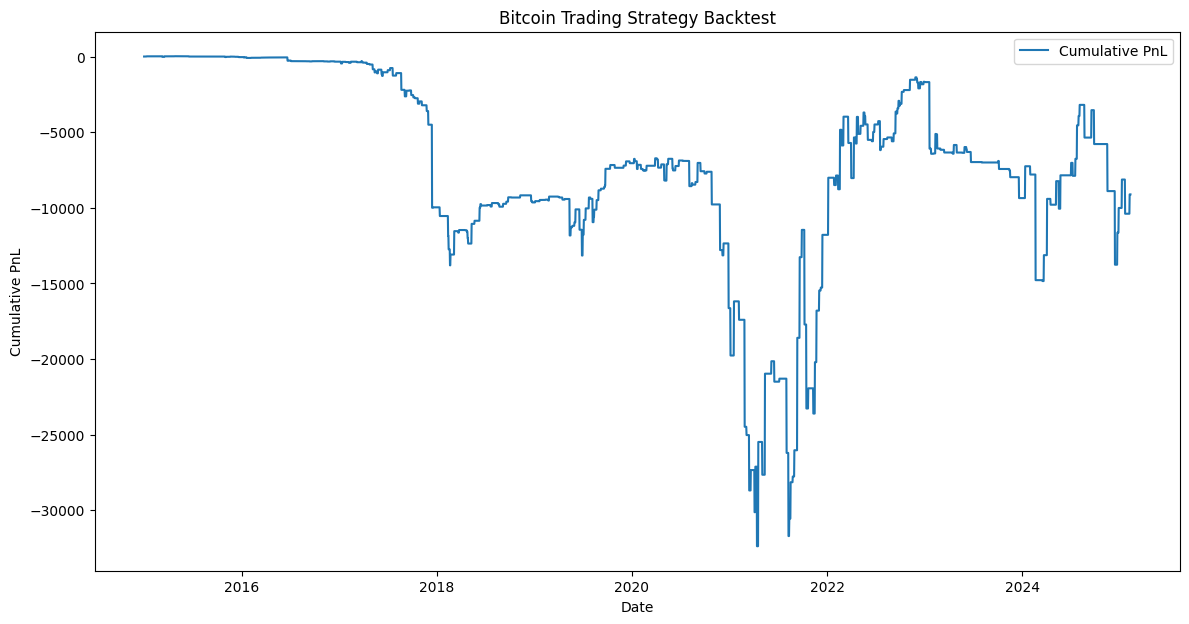

In [117]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Cumulative PnL'], label='Cumulative PnL')
plt.title('Bitcoin Trading Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.legend()
plt.show()

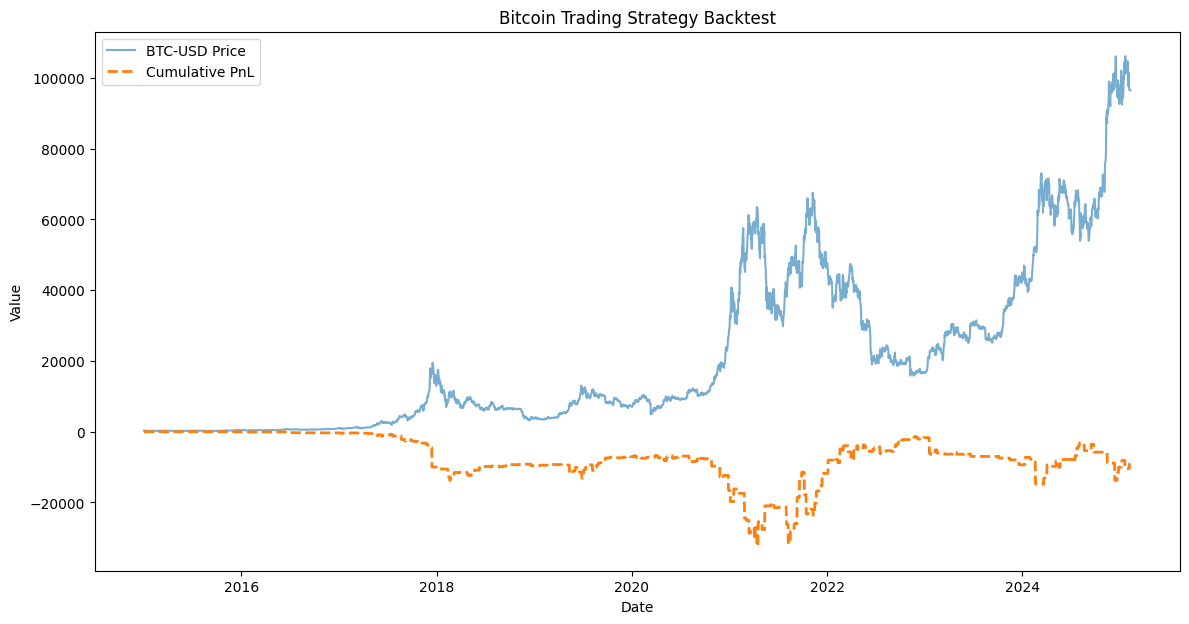

In [118]:
# Plot the results
plt.figure(figsize=(14, 7))

# Plot Bitcoin price
plt.plot(btc_data['Close'], label='BTC-USD Price', alpha=0.6)

# Plot Cumulative PnL
plt.plot(btc_data['Cumulative PnL'], label='Cumulative PnL', linestyle='--', linewidth=2)

plt.title('Bitcoin Trading Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [119]:
# Initialize position and PnL columns
btc_data['Position2'] = 0.0
btc_data['PnL2'] = 0.0

# Implement the strategy
for i in range(1, len(btc_data)):
    if btc_data.index[i-1].is_month_end and btc_data.index[i].is_month_start:
        # Buy at the close of the last day of the month
        buy_price = btc_data['Close'].iloc[i-1].item()
        # Sell at the close of the first day of the next month
        sell_price = btc_data['Close'].iloc[i].item()
        # Calculate PnL
        btc_data.loc[btc_data.index[i], 'PnL2'] = sell_price - buy_price
        # Update position (optional, for tracking purposes)
        btc_data.loc[btc_data.index[i-1], 'Position2'] = 1  # Buy
        btc_data.loc[btc_data.index[i], 'Position2'] = 0    # Sell

# Calculate cumulative PnL
btc_data['Cumulative PnL2'] = btc_data['PnL2'].cumsum()

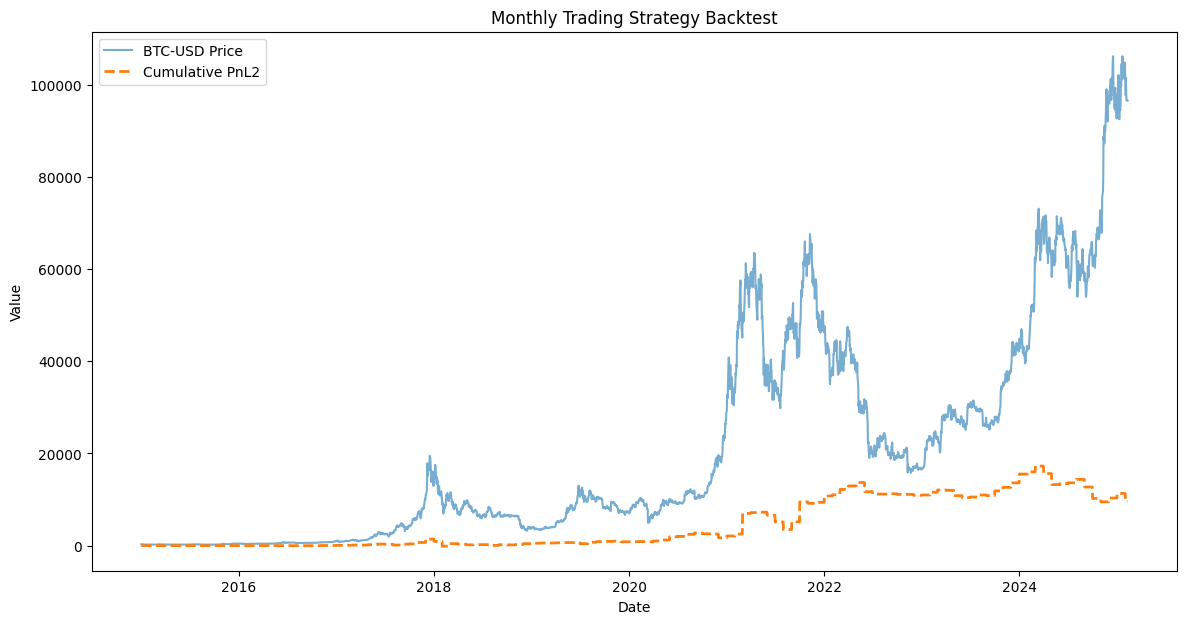

In [120]:
# Plot the results
plt.figure(figsize=(14, 7))

# Plot Bitcoin price
plt.plot(btc_data['Close'], label='BTC-USD Price', alpha=0.6)

# Plot Cumulative PnL
plt.plot(btc_data['Cumulative PnL2'], label='Cumulative PnL2', linestyle='--', linewidth=2)

plt.title('Monthly Trading Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()